<a href="https://colab.research.google.com/github/NurlailyAsrobika16/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. import folder yang ada di Drive**

In [1]:
from google.colab import drive

drive.mount('/content/drive')
     

Mounted at /content/drive


**2. Import beberapa library**

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

## Mean Filtering

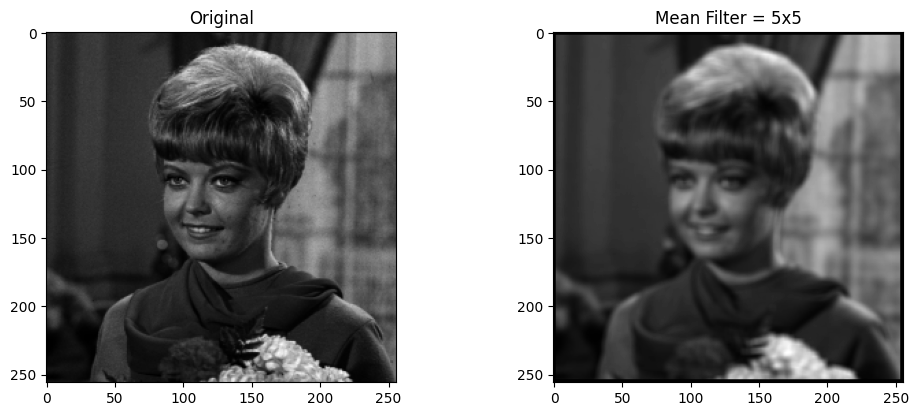

In [74]:
def Mean(image, filter_size):
    # membuat array kosong dengan ukuran yang sama dengan gambar inputan
    output = np.zeros(image.shape, np.uint8)

    # membuat variabel kosong
    result = 0

    # ukuran filter = 5x5
    if filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                for y in range(-2, 3):
                    for x in range(-2, 3):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0
        return output


def main():
    # read image
    img_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
    img_gray_female= cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)


    # filter ukuran 5x5
    mean_female_5x5 = Mean(img_gray_female, 25)

    # mengatur tampilan ukuran gambar
    fig = plt.figure(figsize=(12,10))

    # tampilan gambar original
    fig.add_subplot(2, 2, 1)
    plt.title('Original')
    plt.imshow(img_gray_female, cmap='gray')


    # tampilan gambar filtering
    fig.add_subplot(2, 2, 2)
    plt.title('Mean Filter = 5x5')
    plt.imshow(mean_female_5x5, cmap='gray')

    plt.show()


if __name__ == "__main__":
    main()

## Median Filtering

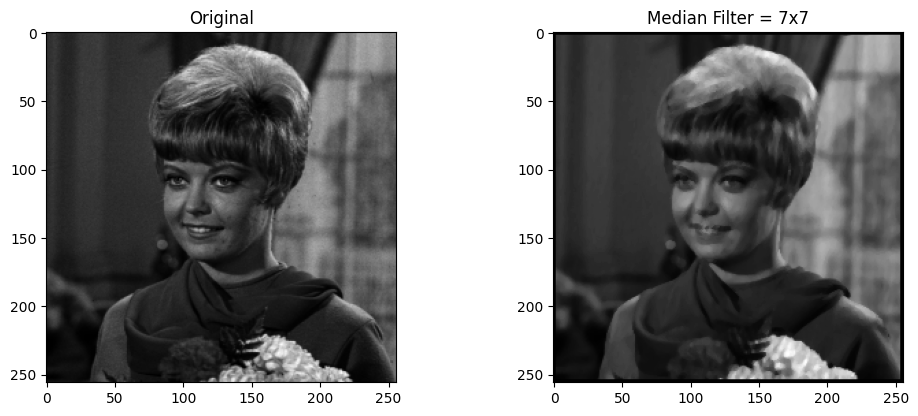

In [73]:
def Median(image, filter_size):
    # membuat array kosong dengan ukuran yang sama dengan gambar inputan
    output = np.zeros(image.shape, np.uint8)

    # membuat array kernel filter dengan ukuran yang sama dengan filter_size
    filter_array = [image[0][0]] * filter_size

    # ukuran filter 7x7
    if filter_size == 49:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
            
                # mengurutkan array
                filter_array.sort()

                # masukkan nomor median ke dalam output
                output[j][i] = filter_array[6]
    return output


def main():
    img_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
    img_gray_female= cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)

     # filter ukuran 7x7
    median_female_7x7 = Median(img_gray_female, 49)

    # mengatur tampilan ukuran gambar
    fig = plt.figure(figsize=(12,10))

    # tampilan gambar original
    fig.add_subplot(2, 2, 1)
    plt.imshow( img_gray_female, cmap='gray')
    plt.title('Original')

    # tampilan gambar filtering
    fig.add_subplot(2, 2, 2)
    plt.imshow(median_female_7x7 , cmap='gray')
    plt.title('Median Filter = 7x7')
    plt.show()


if __name__ == "__main__":
    main()



## Modus Filtering

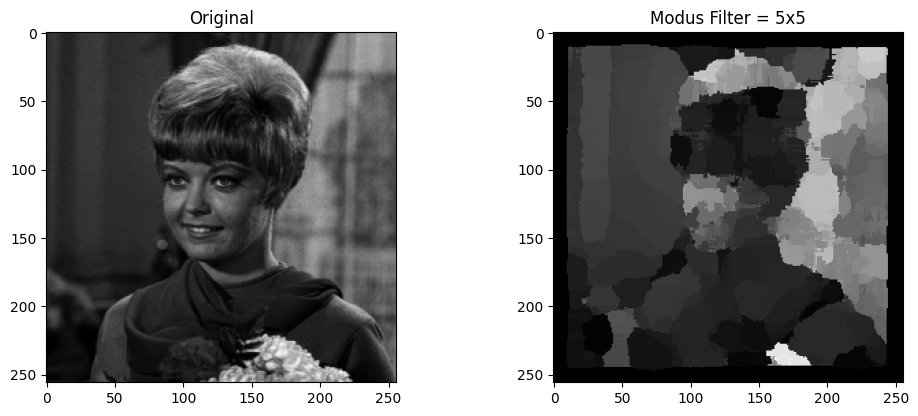

In [72]:
def ModusFilter(image, filter_size):
    # membuat array kosong
    output = np.zeros(image.shape, dtype=np.uint8)

    # membuat padding pada citra input
    padding_width = filter_size // 2
    padding_img = np.pad(image, padding_width, mode='constant')

    for i in range(padding_width, padding_img.shape[0] - padding_width):
        for j in range(padding_width, padding_img.shape[1] - padding_width):

            # membuat array kosong untuk piksel-piksel di dalam filter
            values = np.zeros(filter_size * filter_size, dtype=np.uint8)
            k = 0

            # iterasi pada setiap piksel di dalam filter
            for x in range(-padding_width, padding_width + 1):
                for y in range(-padding_width, padding_width + 1):
                    values[k] = padding_img[i + x, j + y]
                    k += 1

            # mencari nilai modus dari piksel
            mode_value = np.bincount(values).argmax()
            # menempatkan nilai modus ke dalam citra output
            output[i - padding_width, j - padding_width] = mode_value

    return output

def main():
    img_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
    img_gray_female= cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)


    # filtering gambar 5x5
    modus_female_5x5 = ModusFilter(img_gray_female, 25)

    # mengatur tampilan ukuran gambar
    fig = plt.figure(figsize=(12,10))

    # tampilan gambar original
    fig.add_subplot(2, 2, 1)
    plt.title('Original')
    plt.imshow(img_gray_female, cmap='gray')

    # tampilan gambar filtering
    fig.add_subplot(2, 2, 2)
    plt.title('Modus Filter = 5x5')
    plt.imshow(modus_female_5x5, cmap='gray')

    plt.show()
    
if __name__ == "__main__":
    main()

## Low-Pass Filtering

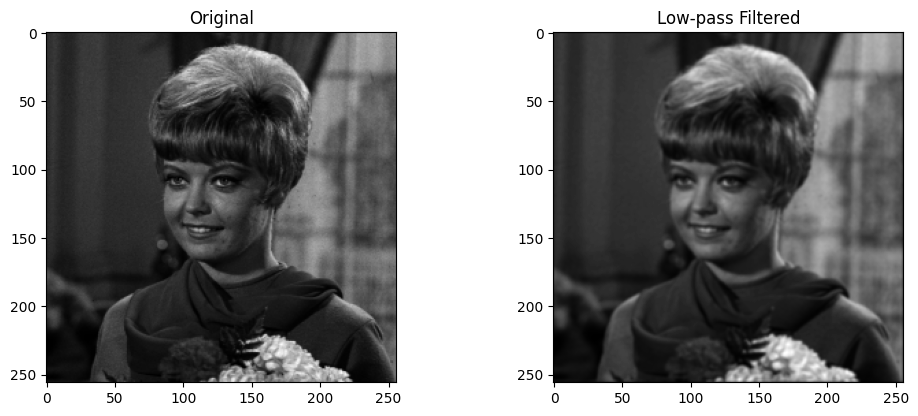

In [71]:
def conv2d(image, kernel):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Create a zero-filled matrix to store the output
    output = np.zeros((image_rows, image_cols))

    # Calculate the "valid" region of the input image
    pad_height = kernel_rows // 2
    pad_width = kernel_cols // 2
    image_padded = np.zeros((image_rows + pad_height*2, image_cols + pad_width*2))
    image_padded[pad_height:-pad_height, pad_width:-pad_width] = image

    # Perform convolution
    for row in range(image_rows):
        for col in range(image_cols):
            output[row, col] = np.sum(kernel * image_padded[row:row + kernel_rows, col:col + kernel_cols])

    return output

def main():
    img_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)

    # Define the low-pass filter kernel
    low_pass = np.array([
        [1/16, 1/8, 1/16],
        [1/8, 1/4, 1/8],
        [1/16, 1/8, 1/16]
    ])

    # Apply the filter
    low_pass_img = conv2d(img_gray, low_pass)

    # Show the images
    fig = plt.figure(figsize=(12,10))
    fig.add_subplot(2,2,1)
    plt.title('Original')
    plt.imshow(img_gray, cmap='gray')
    fig.add_subplot(2,2,2)
    plt.title('Low-pass Filtered')
    plt.imshow(low_pass_img, cmap='gray')
    plt.show()

if __name__ == "__main__":
    main()

## High-Pass Filtering

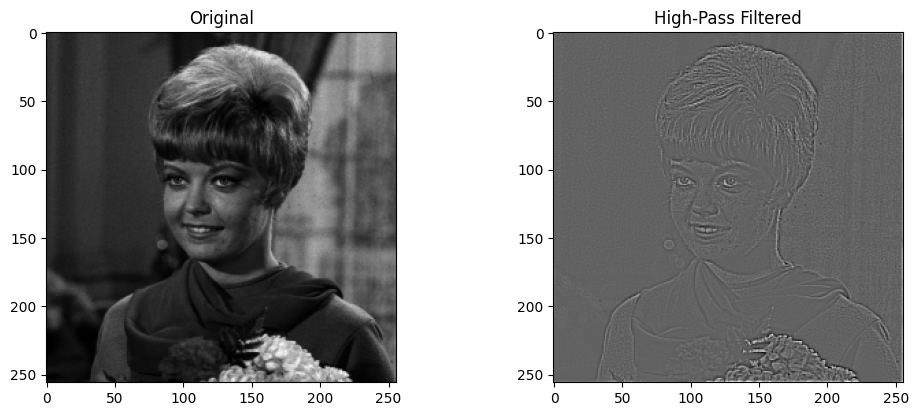

In [70]:
def conv2d(image, kernel):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Create a zero-filled matrix to store the output
    output = np.zeros((image_rows, image_cols))

    # Calculate the "valid" region of the input image
    pad_height = kernel_rows // 2
    pad_width = kernel_cols // 2
    image_padded = np.zeros((image_rows + pad_height*2, image_cols + pad_width*2))
    image_padded[pad_height:-pad_height, pad_width:-pad_width] = image

    # Perform convolution
    for row in range(image_rows):
        for col in range(image_cols):
            output[row, col] = np.sum(kernel * image_padded[row:row + kernel_rows, col:col + kernel_cols])

    return output

def main():
    img_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)

    # Define the high-pass filter kernel
    high_pass = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])

    # Perform high-pass filtering
    high_pass_img = conv2d(img_gray, high_pass)

    # Set up figure size
    fig = plt.figure(figsize=(12, 10))

    # Plot original image
    fig.add_subplot(2, 2, 1)
    plt.title('Original')
    plt.imshow(img_gray, cmap='gray')

    # Plot high-pass filtered image
    fig.add_subplot(2, 2, 2)
    plt.title('High-Pass Filtered')
    plt.imshow(high_pass_img, cmap='gray')

    plt.show()

if __name__ == '__main__':
    main()